# <u>Submission instructions</u>
### Submission must be in pairs, unless otherwise authorized.
#### Submit by 28/2/2024

<ul style="font-size: 17px">
<li> This notebook contains all the questions. You should follow the instructions below.</li>
<li> Solutions for both theoretical and practical parts should be written in this notebook</li>
</ul>

<h3> Moodle submission</h3>


<p style="font-size: 17px">
You should submit three files:
</p>
<ul style="font-size: 17px">
<li>IPYNB notebook:
  <ul>
  <li>All the wet and dry parts, including code, graphs, discussion, etc.</li>
  </ul>
</li>
<li>PDF file:
  <ul>
  <li>Export the notebook to PDF. Make sure that all the cells are visible.</li>
  </ul>
</li>
<li>Pickle file:
  <ul>
    <li>As requested in Q2.a</li>
  </ul>
</li>
</ul>
<p style="font-size: 17px">
All files should be in the following format: "HW1_ID1_ID2.file"
<br>
Good Luck!
</p>

<h1> Question 1</h1>

## I. Softmax Derivative (10pt)

<p style="font-size: 17px">
Derive the gradients of the softmax function and demonstrate how the expression can be reformulated solely by using the softmax function, i.e., in some expression where only $softmax(x)$, but not $x$, is present). Recall that the softmax function is defined as follows:
$$softmax(x)_i = \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}}$$

### I. Softmax Derivative - Answer:
$$\frac{\partial}{\partial x_k} \text{softmax}(x)_i = \frac{\partial}{\partial x_k} \left( \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}} \right)$$

1. **When \(i = k\):**

$$\frac{\partial}{\partial x_k} \text{softmax}(x)_i = \frac{e^{x_i} \sum_{j=1}^{N} e^{x_j} - e^{x_i}e^{x_i}}{\left(\sum_{j=1}^{N} e^{x_j}\right)^2}= \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}} \left( 1 - \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}} \right) = \text{softmax}(x)_i \left(1 - \text{softmax}(x)_i\right)$$

2. **When \(i != k\):**

$$ \frac{\partial}{\partial x_k} \text{softmax}(x)_i = -\frac{e^{x_i}e^{x_k}}{\left(\sum_{j=1}^{N} e^{x_j}\right)^2} = -\text{softmax}(x)_i \text{softmax}(x)_k $$

Putting it all together, the derivative of the softmax function with respect to (x_k) can be summarized as:

$$\frac{\partial \text{softmax}(x)_i}{\partial x_k} = \begin{cases} \text{softmax}(x)_i \left(1 - \text{softmax}(x)_i\right) & \text{if } i = k, \\ -\text{softmax}(x)_i \text{softmax}(x)_k & \text{if } i \neq k. \end{cases} $$

## II. Cross-Entropy Gradient (10pt)
<p style="font-size: 17px">
Derive the gradient of cross-entropy loss with regard to the inputs of a softmax function. i.e., find the gradients with respect to the softmax input vector $\theta$, when the prediction is denoted by $\hat{y} = softmax(\theta)$. Remember the cross entropy function is:
$$CE(y, \hat{y}) = -\sum_i y_i log(\hat{y_i})$$


<p style="font-size: 17px">where $y$ is the one-hot label vector, and $\hat{y}$ is the predicted probability vector for all classes.

### II. Cross-Entropy Gradient - Answer

<!--- write your answer -->
$$\frac{\partial CE(y, \hat{y})}{\partial\theta} = \nabla_{\theta} CE(y, \hat{y}) = \left[ \frac{\partial CE(y, \hat{y})}{\partial \theta_1}, \frac{\partial CE(y, \hat{y})}{\partial \theta_2}, \ldots, \frac{\partial CE(y, \hat{y})}{\partial \theta_N} \right] $$

therefore, we shall look for: $\frac{\partial CE}{\partial \theta_k}$


Given:
- for the softmax function: $(\hat{y}_i = \frac{e^{\theta_i}}{\sum_{j=1}^{N} e^{\theta_j}})$
- for the cross-entropy loss: $(CE(y, \hat{y}) = -\sum_i y_i \log(\hat{y_i}))$

We get (whith the chain rule):
$$ \frac{\partial CE}{\partial \theta_k} = \frac{\partial}{\partial \theta_k} \left( -\sum_i y_i \log(\hat{y_i}) \right) = -\sum_i y_i \frac{\partial}{\partial \theta_k} \log(\hat{y_i}) = -\sum_i y_i \frac{1}{\hat{y_i}} \frac{\partial \hat{y_i}}{\partial \theta_k} $$


as we shown in 1.1, the derivative of the softmax function with respect to $(\theta_k)$ is:

$$ \frac{\partial \hat{y_i}}{\partial \theta_k} = \begin{cases} \hat{y_i} (1 - \hat{y_i}) & \text{if } i = k, \\ -\hat{y_i} \hat{y_k} & \text{if } i \neq k. \end{cases} $$

Now, using this and $I_{ik}$, where $I$ is an indicator which equals to 1 when i = k, and 0 otherwise, we get the following:

$$\frac{\partial CE}{\partial \theta_k} = -\sum_i y_i \frac{1}{\hat{y_i}} \left[ \hat{y_i} (1 - \hat{y_i}) I_{ik} - \hat{y_i} \hat{y_k} (1 - I_{ik}) \right]$$


Since $(y)$ is a one-hot vector, $(y_i)$ will be 0 for all $(i)$ except the true class, let's say $(j)$, for which $(y_j = 1)$. Therefore, we get the following:

$$\frac{\partial CE}{\partial \theta_k} = -(y_k \frac{1}{\hat{y_k}} \hat{y_k} (1 - \hat{y_k}) + \sum_{i \neq k} y_i \frac{1}{\hat{y_i}} (-\hat{y_i} \hat{y_k})) $$

$$= -(y_k (1 - \hat{y_k}) - \sum_{i \neq k} y_i \hat{y_k})$$

$$ = -y_k + y_k \hat{y_k} + \hat{y_k} \sum_{i \neq k} y_i$$

Given that $(\sum_{i \neq k} y_i = 1 - y_k)$ for a one-hot vector $(y)$, and acknowledging that $(y_k)$ can only be 0 or 1:

$$\frac{\partial CE}{\partial \theta_k} = \hat{y_k} - y_k $$

Which gives us:
$$\frac{\partial CE(y, \hat{y})}{\partial\theta} = \hat{y} - y $$

# Question 2

## I. Derivative Of Activation Functions (10pt)

<p style="font-size: 17px">
The following cell contains an implementation of some activation functions. Implement the corresponding derivatives.</p>

In [2]:
import torch

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def tanh(x):
    return torch.div(torch.exp(x) - torch.exp(-x), torch.exp(x) + torch.exp(-x))


def softmax(x):
    exp_x = torch.exp(x.T - torch.max(x, dim=-1).values).T  # Subtracting max(x) for numerical stability
    return exp_x / exp_x.sum(dim=-1, keepdim=True)

In [3]:
def d_sigmoid(x):
    sig = sigmoid(x)
    return sig * (1 - sig)


def d_tanh(x):
    t = tanh(x)
    return 1 - t**2

def d_softmax(x):
    sm = softmax(x)
    batch_size, n_classes = sm.shape
    jacobian = torch.zeros((batch_size, n_classes, n_classes))
    for i in range(batch_size):
        for j in range(n_classes):
            for k in range(n_classes):
                if j == k:
                    jacobian[i, j, k] = sm[i, j] * (1 - sm[i, j])
                else:
                    jacobian[i, j, k] = -sm[i, j] * sm[i, k]
    return jacobian


## II. Train a Fully Connected network on MNIST (30pt)

<p style="font-size: 17px">In the following exercise, you will create a classifier for the MNIST dataset.
You should write your own training and evaluation code and meet the following
constraints:
<ul>
<li> You are only allowed to use torch tensor manipulations.</li>
<li> You are NOT allowed to use:
  <ul>
  <li> Auto-differentiation - backward()</li>
  <li> Built-in loss functions</li>
  <li> Built-in activations</li>
  <li> Built-in optimization</li>
  <li> Built-in layers (torch.nn)</li>
  </ul>
  </li>
</ul>
</h4>

<p style="font-size: 17px">
 a) The required classifier class is defined.
<ul style="font-size: 17px">
<li> You should implement the backward pass of the model.
<li> Train the model and plot the model's accuracy and loss (both on train and test sets) as a function of the epochs.
<li> You should save the model's weights and biases. Change the student_ids to yours.
</ul>
<p style="font-size: 17px">In this section, you <b>must</b> use the "set_seed" function with the given seed and <b>sigmoid</b> as an activation function.
</p>

In [4]:
import torch
import torchvision
from torch.utils.data import DataLoader

import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Constants
SEED = 42
EPOCHS = 16
BATCH_SIZE = 32
NUM_OF_CLASSES = 10

# Setting seed
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ["PYTHONHASHSEED"] = str(seed)


# Transformation for the data
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torch.flatten])


# Cross-Entropy loss implementation
def one_hot(y, num_of_classes=10):
    hot = torch.zeros((y.size()[0], num_of_classes))
    hot[torch.arange(y.size()[0]), y] = 1
    return hot

def cross_entropy(y, y_hat):
    return -torch.sum(one_hot(y) * torch.log(y_hat)) / y.size()[0]

In [5]:
# Create dataloaders
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                            download=True, transform=transform)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)


test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                           download=True, transform=transform)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE,)

1.7%

100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100.0%

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw




13.9%

100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100.0%

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [6]:
class FullyConnectedNetwork:
    def __init__(self, input_size, output_size, hidden_size1, activiation_func, lr=0.01):
        # parameters
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size1 = hidden_size1

        # activation function
        self.activation_func = activiation_func

        # weights
        self.W1 = torch.randn(self.input_size, self.hidden_size1)
        self.b1 = torch.zeros(self.hidden_size1)

        self.W2 = torch.randn(self.hidden_size1, self.output_size)
        self.b2 = torch.zeros(self.output_size)

        self.lr = lr

    def forward(self, x):
        self.z1 = torch.matmul(x, self.W1) + self.b1
        h1 = self.activation_func(self.z1)
        self.z2 = torch.matmul(h1, self.W2) + self.b2
        y_hat = softmax(self.z2)
        return y_hat

    def backward(self, x, y, y_hat):
        h1 = sigmoid(self.z1)
        y_one_hot = one_hot(y, num_of_classes=self.output_size)


        # as we seen in the first section, the CE of a softmax y_hat we get:
        # dl_dyhat = y_hat - y
        # dL_dz2 = dl_dyhat * d_sigmoid(y_hat)

        dL_dz2 = y_hat - y_one_hot # no activation after z2, soft into CE

        dL_dW2 = torch.matmul(h1.t(), dL_dz2)
        dL_db2 = torch.sum(dL_dz2, axis=0)

        dL_dh1 = torch.matmul(dL_dz2, self.W2.t())
        dL_dz1 = dL_dh1 * d_sigmoid(h1)

        dL_dW1 = torch.matmul(x.t(), dL_dz1)
        dL_db1 = torch.sum(dL_dz1, axis=0)

        # Update parameters
        with torch.no_grad():
            self.W1 -= self.lr * dL_dW1
            self.b1 -= self.lr * dL_db1
            self.W2 -= self.lr * dL_dW2
            self.b2 -= self.lr * dL_db2

In [16]:
set_seed(SEED)
model = FullyConnectedNetwork(784, 10, 128, sigmoid, lr=0.01)

In [17]:
# TODO
# Write a training loop

# Function to compute accuracy
def compute_accuracy(y_hat, y):
    predictions = torch.argmax(y_hat, dim=1)
    correct = (predictions == y).float().sum()
    return correct / y.shape[0]

# Evaluation function
def evaluate_model(model, test_loader):
    total_loss, total_correct, total_samples = 0, 0, 0
    with torch.no_grad():
        for x, y in test_loader:
            y_hat = model.forward(x)
            loss = cross_entropy(y, y_hat)
            total_loss += loss.item()
            total_correct += compute_accuracy(y_hat, y) * y.size(0)
            total_samples += y.size(0)
    return total_loss / len(test_loader), total_correct / total_samples

# Training function - learning_rate as param for 2.b
def train_model(model, train_loader, learning_rate, num_epochs):
    train_losses, test_losses = [], []
    train_accuracies, test_accuracies = [], []

    for epoch in range(num_epochs):
        model.lr = learning_rate
        total_loss, total_correct, total_samples = 0, 0, 0

        for x, y in train_dataloader:
            y_hat = model.forward(x)
            loss = cross_entropy(y, y_hat)
            total_loss += loss.item()
            model.backward(x, y, y_hat)

            total_loss += loss.item()
            total_correct += compute_accuracy(y_hat, y) * y.size(0)
            total_samples += y.size(0)

        train_losses.append(total_loss / len(train_loader))
        train_accuracies.append(total_correct / total_samples)

        # Evaluate on test set
        test_loss, test_accuracy = evaluate_model(model, test_dataloader)
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch+1}, Train Loss: {train_losses[-1]}, Train Accuracy: {train_accuracies[-1]}, Test Loss: {test_losses[-1]}, Test Accuracy: {test_accuracies[-1]}")

    return train_losses, train_accuracies, test_losses, test_accuracies

In [18]:
# Plot function
def plot_metrics(learning_rates, metrics):
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    for lr, metric in zip(learning_rates, metrics):
        train_losses, train_accuracies, test_losses, test_accuracies = metric

        axs[0, 0].plot(train_losses, label=f"LR={lr}")
        axs[0, 1].plot(train_accuracies, label=f"LR={lr}")
        axs[1, 0].plot(test_losses, label=f"LR={lr}")
        axs[1, 1].plot(test_accuracies, label=f"LR={lr}")

    axs[0, 0].set_title("Training Loss")
    axs[0, 1].set_title("Training Accuracy")
    axs[1, 0].set_title("Testing Loss")
    axs[1, 1].set_title("Testing Accuracy")

    for ax in axs.flat:
        ax.set_xlabel("Epoch")
        ax.set_ylabel("Value")
        ax.legend()

    plt.tight_layout()
    plt.show()

Training with learning rate: 0.01, for 10 epochs
Epoch 1, Train Loss: 1.3673323019524415, Train Accuracy: 0.8417666554450989, Test Loss: 0.43308941692488784, Test Accuracy: 0.8889999985694885
Epoch 2, Train Loss: 0.7663689537346363, Train Accuracy: 0.8979833126068115, Test Loss: 0.3523553828679073, Test Accuracy: 0.9017000198364258
Epoch 3, Train Loss: 0.6558010122299195, Train Accuracy: 0.9076833128929138, Test Loss: 0.3147418176154264, Test Accuracy: 0.9075999855995178
Epoch 4, Train Loss: 0.6086019537230333, Train Accuracy: 0.9123333096504211, Test Loss: 0.29558710855976367, Test Accuracy: 0.9120000004768372
Epoch 5, Train Loss: 0.5850755121151606, Train Accuracy: 0.9142500162124634, Test Loss: 0.2851318962003191, Test Accuracy: 0.9146000146865845
Epoch 6, Train Loss: 0.5701971377034982, Train Accuracy: 0.9155166745185852, Test Loss: 0.28201497331582986, Test Accuracy: 0.9146999716758728
Epoch 7, Train Loss: 0.5586753542482853, Train Accuracy: 0.9167166948318481, Test Loss: 0.281194

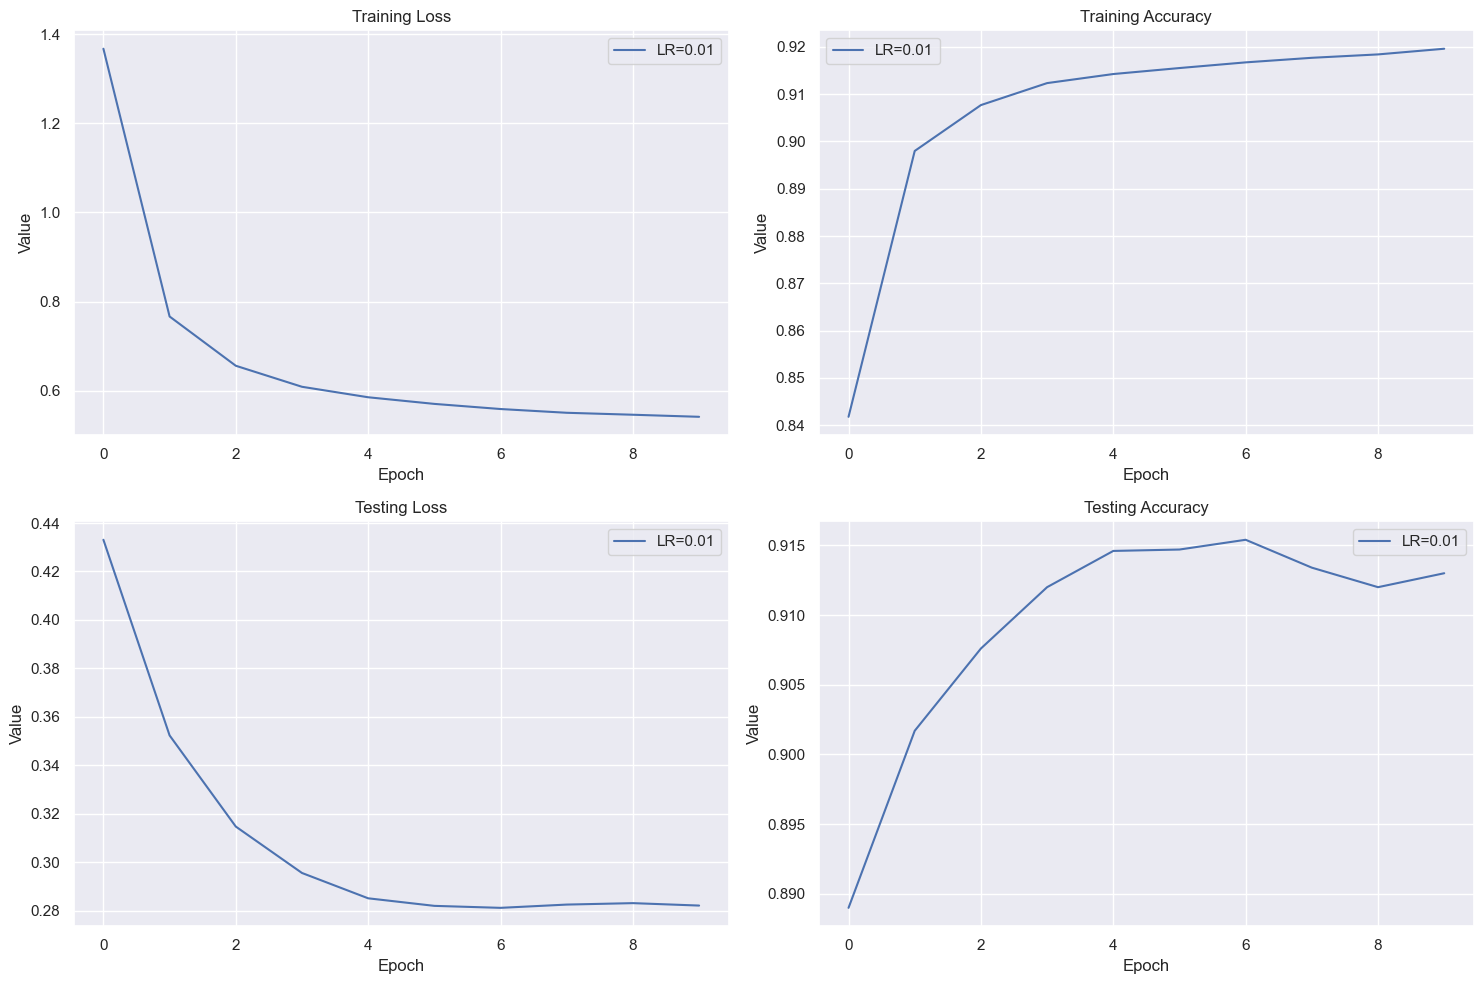

In [19]:
print(f"Training with learning rate: 0.01, for 10 epochs")
metric = train_model(model, train_dataloader, 0.01, 10)
plot_metrics([0.01], [metric])

In [9]:
students_ids = "318825551_321960825"
torch.save({"W1": model.W1, "W2": model.W2, "b1": model.b1, "b2": model.b2}, f"HW1_{students_ids}.pkl")

<p style="font-size: 17px"> b) Train the model with various learning rates (at least 3).
<ul style="font-size: 17px">
<li> Plot the model's accuracy and loss (both on train and test sets) as a function of the epochs.
<li>Discuss the differences in training with different learning rates. Support your answer with plots.

Training with learning rate: 0.001


Epoch 1, Train Loss: 2.7300034709453582, Train Accuracy: 0.6845666766166687, Test Loss: 0.7244455134644866, Test Accuracy: 0.8165000081062317
Epoch 2, Train Loss: 1.3531735112071037, Train Accuracy: 0.8259666562080383, Test Loss: 0.5756039540417278, Test Accuracy: 0.8495000004768372
Epoch 3, Train Loss: 1.1456415314098198, Train Accuracy: 0.8520333170890808, Test Loss: 0.5091278190090777, Test Accuracy: 0.8640999794006348
Epoch 4, Train Loss: 1.0311692289054393, Train Accuracy: 0.8652166724205017, Test Loss: 0.4682257163766831, Test Accuracy: 0.8762000203132629
Epoch 5, Train Loss: 0.9533644511053959, Train Accuracy: 0.8732666373252869, Test Loss: 0.439592874518182, Test Accuracy: 0.8828999996185303
Epoch 6, Train Loss: 0.8956570773144563, Train Accuracy: 0.8792999982833862, Test Loss: 0.418176224052061, Test Accuracy: 0.8877000212669373
Epoch 7, Train Loss: 0.8507214262783528, Train Accuracy: 0.8850333094596863, Test Loss: 0.40126512736266556, Test Accuracy: 0.8901000022888184
Epoch 8

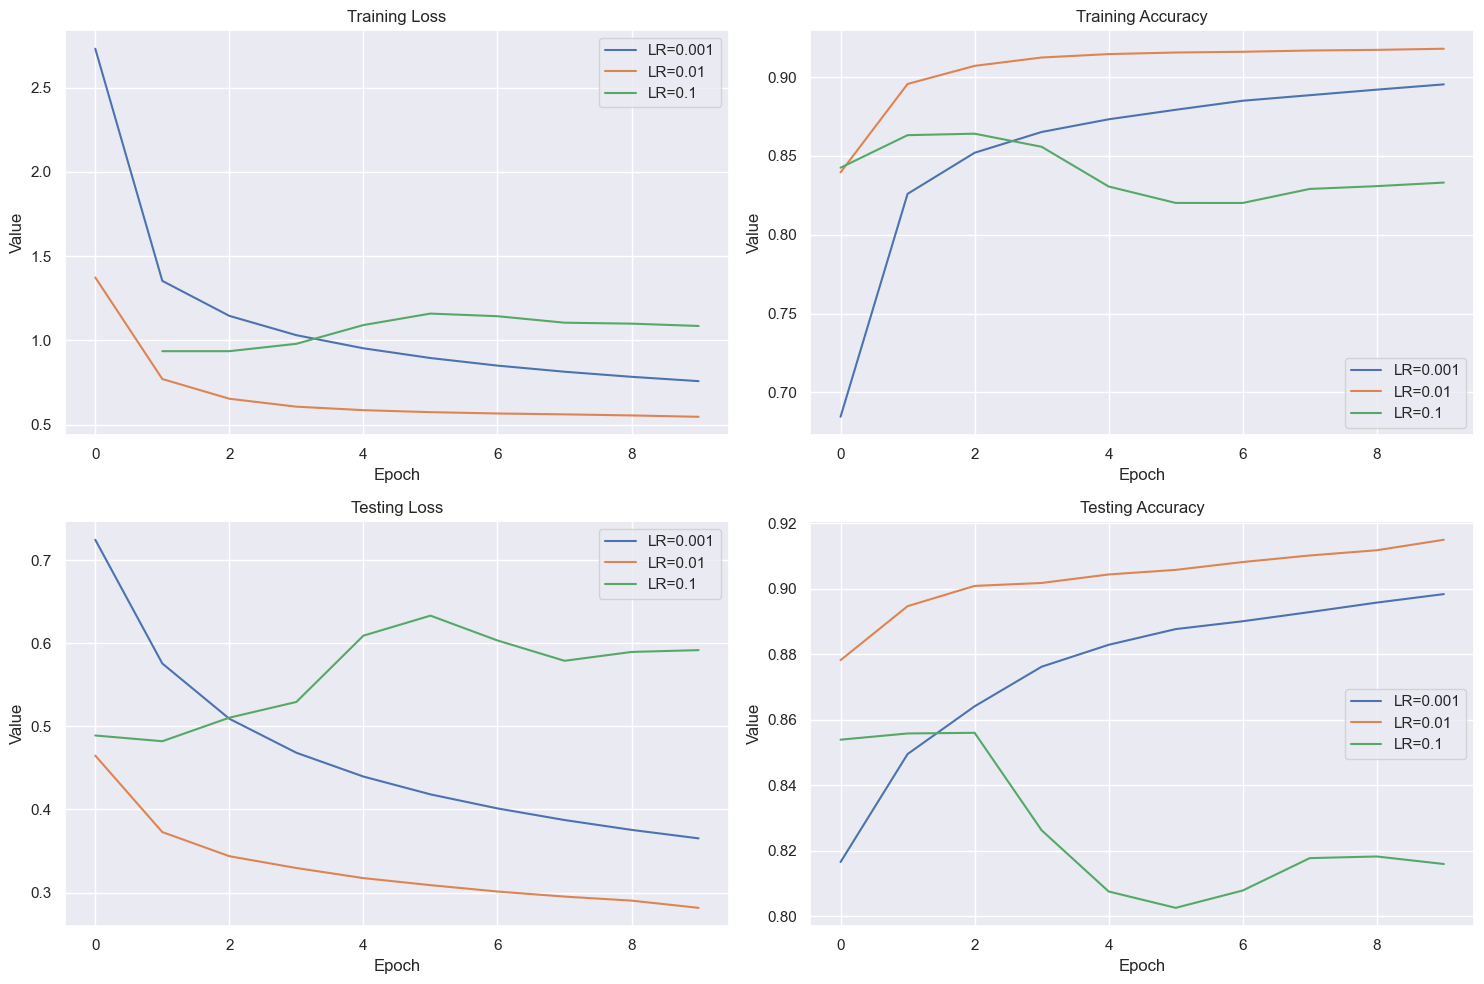

In [11]:
learning_rates = [0.001, 0.01, 0.1]
metrics = []

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    model = FullyConnectedNetwork(784, 10, 128, sigmoid, lr)
    metric = train_model(model, train_dataloader, lr, 10)
    metrics.append(metric)

plot_metrics(learning_rates, metrics)


### Answer - 2.II.b Discussing the results:
The upsides and downsides of the GD algorithem can be seen through here with the same fashion as we seen before.
in theory, learning rate basically determines the size of the jump we make with each gradient.

When the learning rate is too low, each jump will be small, and the model learns slowly and risks not converging within a practical time frame, its also prone to get stuck in a local minima, because its jumps are not big enough to "get out of the pit".
In the plot: we can see that The model with a learning rate of 0.001 exhibits a slow but steady decrease in training loss and a gradual increase in training accuracy. This suggests that the learning rate is sufficiently small to allow the model to learn incrementally. it may or may not get stuck in a local minima further down the line.

On the other hand, a too high of a learning rate, while less likely to get stuck in local minimums and will make greater strides while learning, but can be hectic and might miss the optimal values each jump. basically a too high of a learning rate might cause the model to overshoot the minimum.
In the plot: we can see that The model with a learning rate of 0.1 The training accuracy rises rapidly at first but then deteriorates, reinforcing the idea of instability due to a high learning rate. The testing accuracy initially increases but then drops significantly, while the loss has a slight decrease followed by an increase, indicating that the model is not generalizing well and is likely overfitting due to excessive learning steps.

The moderate learning rate, will offer a good balance, leading to a model that learns efficiently and generalizes well to unseen data.
In the plot: we can see that The model with a learning rate of 0.01, this learning rate shows a more rapid decrease in training loss and a quicker increase in training accuracy compared to the lower learning rate. However, after an initial improvement, the accuracy seems to plateau, which might suggest that it's nearing optimal performance within the given epoch range. The testing accuracy improves significantly and outperforms the learning rate of 0.001, while the loss decreases steadily. This indicates a good balance between learning speed and the model's ability to generalize.

its worth to note that the terms: high ,low, and moderate learning rates are highly dependant on the task at hand, the number of epochs, the distance between them, and might differ widly between models and data sets. they manily come to descrive the relations between different values to the learning rate. even in this case it is highly possible that as the epochs rise, lr=0.001 would be considered better as it wont get stuck in a local minima and perform better both on the train and test sets than the "moderate" lr=0.01.
if we were to compute a lot of learning rates from very low values up to high ones for a lot of epochs on this model, it would showcase better the theoretical points made. (but unfortunatly, we dont have nvidias servers)

# Question 3

## I. Implement and Train a CNN (30pt)

<p style="font-size: 17px"> You are a data scientist at a supermarket. Your manager asked you to write a new image classifiaction algorithem for the self checkout cashiers. The images are of products from your grocery store (dataset files are attched in the Moodle).
<br>
Your code and meet the following constraints:
<ul style="font-size: 17px">
<li> Your classifier must be CNN based</li>
<li> You are not allowed to use any pre-trained model</li>
</ul>
<br>
<p style="font-size: 17px">
In order to satisfy your boss you have to reach 65% accuracy on the test set. You will get a bonus for your salary (and 10 points to your grade) if your model's number of paramters is less than 100K. You can reutilize code from the tutorials.

<ul style="font-size: 17px">
<li>Train the model and plot the model's accuracy and loss (both on train and validation sets) as a function of the epochs. </li>
<li>Report the test set accurecy.</li>
<li>Discus the progress you made and describe your final model.</li>

In [161]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.io import read_image
from torch import nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import os
import numpy as np

In [63]:
# Adjust the data loaders to account for the base directory in file paths
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, txt_path, base_dir, img_dir, transform=None, splitter=', '):
        with open(os.path.join(base_dir, txt_path), 'r') as file:
            lines = file.readlines()
        self.img_labels = [int(line.strip().split(splitter)[1]) for line in lines if line != '']
        self.img_files = [os.path.join(base_dir, line.strip().split(splitter)[0]) for line in lines]
        self.transform = transform

    def __len__(self):
        return len(self.img_files)

    def __getitem__(self, idx):
        image = Image.open(self.img_files[idx])
        label = self.img_labels[idx]
        if self.transform:
            if isinstance(self.transform, list):
                for transform in self.transform:
                    image = transform(image)
            else:
                image = self.transform(image)
        return image, label

    def set_transform(self, transform):
        self.transform = transform

In [61]:
transform = transforms.Compose([
    transforms.Resize((348, 348)),
    transforms.ToTensor(),
])

base_dir = os.path.join('HW1_data_updated', 'GroceryStoreDataset')

train_dataset = CustomDataset(txt_path="train.txt", base_dir=base_dir, img_dir='train', transform=transform)
val_dataset = CustomDataset(txt_path="val.txt", base_dir=base_dir, img_dir='val', transform=transform)
test_dataset = CustomDataset(txt_path="test.txt", base_dir=base_dir, img_dir='test', transform=transform)
    
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [44]:

class BasedCNN(nn.Module):
    def __init__(self):
        super(BasedCNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 8, kernel_size=3, padding=2), 
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.MaxPool2d(2,2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(8, 16, kernel_size=3, padding=2),  
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2,2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, padding=2),  
            nn.BatchNorm2d(32),  
            nn.ReLU(),
            nn.MaxPool2d(2,1))
        self.layer4 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=2),  
            nn.BatchNorm2d(64),  
            nn.ReLU(),
            nn.MaxPool2d(2,1))
        self.layer5 = nn.Sequential(
            nn.Conv2d(64, 96, kernel_size=3, padding=2),  
            nn.BatchNorm2d(96),  
            nn.ReLU(),
            nn.MaxPool2d(2,1))
        
        self.global_pool = nn.AdaptiveAvgPool2d(1)
        self.fc1 = nn.Linear(96, 43)  # 43 classes


        self.dropout = nn.Dropout(p=0.5)
        self.activation = nn.ReLU()
        self.logsoftmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.dropout(out)  # Apply dropout here to reduce overfitting
        out = self.global_pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        # out = self.fc2(out)
        
        return self.logsoftmax(out)
    

    # check num of params:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

model = BasedCNN()
print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 84,523 trainable parameters


In [45]:
# train cnn
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# criterion = nn.NLLLoss()
criterion = nn.CrossEntropyLoss()



best_weights = {}
# lrs = [0.001, 0.005, 0.01]

lr = 0.001
print (f"------ Training with learning rate: {lr} ------")
model = BasedCNN().to(device) 
optimizer = optim.Adam(model.parameters(), lr)
train_accuracies, val_accuracies = [0], [0]
train_losses, val_losses = [float("inf")], [float("inf")]
num_epochs = 150

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        if torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(train_accuracy)

    # Validation phase
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for images, labels in val_loader:
            if torch.cuda.is_available():
                images = images.cuda()
                labels = labels.cuda()
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_accuracy = 100 * correct_val / total_val
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_accuracy)
    if val_losses[-1] == min(val_losses):
        best_weights = {lr: {"layer1": model.layer1[0].weight.data.clone(),
                                "layer2": model.layer2[0].weight.data.clone(),
                                "layer3": model.layer3[0].weight.data.clone(),
                                "layer4": model.layer4[0].weight.data.clone(),
                                "layer5": model.layer5[0].weight.data.clone(),
                                "fc1": model.fc1.weight.data.clone(),
                                "epoch": epoch
                            }
                        }

    print(f"Epoch {epoch+1}, Training Loss: {train_losses[-1]}, Training Accuracy: {train_accuracies[-1]}")
    print(f"Epoch {epoch+1}, Validation Loss: {val_losses[-1]}, Validation Accuracy: {val_accuracies[-1]}")

------ Training with learning rate: 0.001 ------
Epoch 1, Training Loss: 2.996428160440354, Training Accuracy: 24.810606060606062
Epoch 1, Validation Loss: 3.3412827491760253, Validation Accuracy: 12.162162162162161
Epoch 2, Training Loss: 2.436163590067909, Training Accuracy: 38.484848484848484
Epoch 2, Validation Loss: 2.6929821491241457, Validation Accuracy: 29.054054054054053
Epoch 3, Training Loss: 2.1493817340760004, Training Accuracy: 45.60606060606061
Epoch 3, Validation Loss: 2.367339539527893, Validation Accuracy: 33.108108108108105
Epoch 4, Training Loss: 1.951426469144367, Training Accuracy: 47.083333333333336
Epoch 4, Validation Loss: 2.339769959449768, Validation Accuracy: 29.72972972972973
Epoch 5, Training Loss: 1.807374363853818, Training Accuracy: 49.166666666666664
Epoch 5, Validation Loss: 2.175720238685608, Validation Accuracy: 31.756756756756758
Epoch 6, Training Loss: 1.6703207464445204, Training Accuracy: 52.04545454545455
Epoch 6, Validation Loss: 2.25556931495

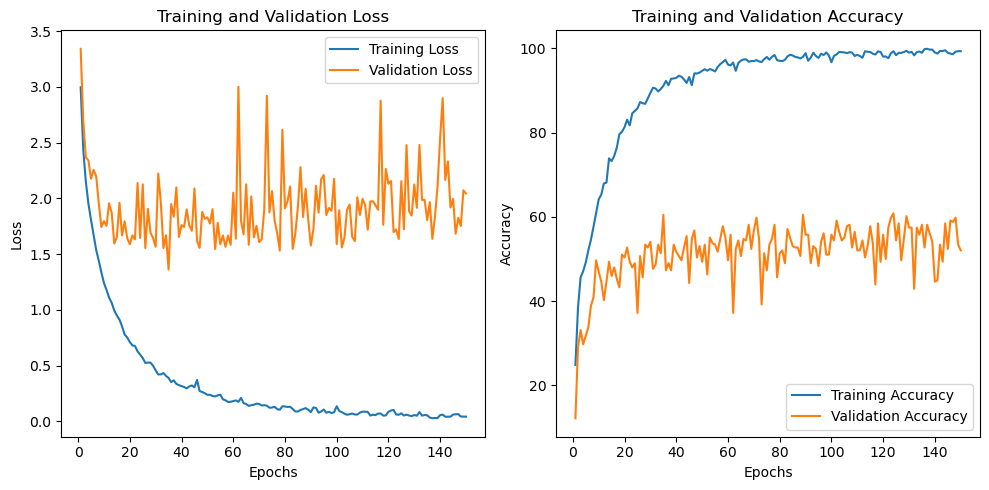

Best Val loss epoch:  35


In [46]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses[1:], label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses[1:], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies[1:], label='Training Accuracy')
plt.plot(range(1, num_epochs+1), val_accuracies[1:], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
print('Best Val loss epoch: ', best_weights[lr]["epoch"] + 1)

In [48]:
# eval
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Test Set Accuracy: {test_accuracy}%')

Test Set Accuracy: 68.12877263581488%


<ul style="font-size: 17px">Disccusion 


The progress achieved using the base code from the tutorial, and expanding it according to the best practices we found on various interned resources. We added a layer one by one, each time evaluating the model, until we got some reasonable results, without exeeding the 100K parameters. The we tried several compinations of hyperparameters, like padding, stride, number of filters (kernels) and channels, and choose the combination that gives the best accuracy. We think that playing more with hyperparameters could bring us to slightly better results, but the lack of data still seriously affects the precision of the model: some of the classes are pretty similar (like soy milk and regular milk) and have only about 40 images each. We could also try to aurment the data, but we already achieved the desired result, so we stopped at this point.
The final model contains 5 convolution layers and one (last) fullconnected layer. Each layer we increased the number of channels, so the model coul achieve more general features.

## II. Analyzing a Pre-trained CNN (Filters) (10pt)

In this part, you are going to analyze a (large) pre-trained model. Pre-trained models are quite popular these days, as big companies can train really large models on large datasets (something that personal users can't do as they lack the sufficient hardware). These pre-trained models can be used to fine-tune on other/small datasets or used as components in other tasks (like using a pre-trained classifier for object detection).

All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225].

You can use the following transform to normalize:

<code>normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])</code>
<a href="https://pytorch.org/vision/stable/models.html">Read more here</a>


1. Load a pre-trained VGG16 with PyTorch using torchvision.models.vgg16(pretrained=True, progress=True, **kwargs) (<a href="https://pytorch.org/vision/stable/models.html#classification">read more here</a>). Don't forget to use the model in evaluation mode (<code>model.eval()</code>).

2. Load the images in the 'birds' folder and display them.

3. Pre-process the images to fit VGG16's architecture. What steps did you take?

4. Feed the images (forward pass) to the model. What are the outputs?

5. Choose an image of a dog in the 'dogs' folder, display it and feed it to network. What are the outputs?

6. For the first 3 filters in the first layer of VGG16, plot the filters, and then plot their response (their output) for the image from question 5. Explain your observations.

In [108]:
# 1. downloading the model
from torchvision import models, transforms
from torchvision.models import VGG16_Weights

# pretrained=True is deprecated, so we used the updated version, with weights
weights = VGG16_Weights.DEFAULT
model = models.vgg16(weights=weights, progress=True)

In [101]:
# create csv files with filenames to feed to the CustomDataSet class
import os
import csv

def create_paths_file(directory, label, txt_file):
    files = os.listdir(directory)
    if not os.path.exists(os.path.join(directory, txt_file)):
        with open(os.path.join(directory, txt_file), mode='w', newline='') as file:
            writer = csv.writer(file)
            for file_name in files:
                writer.writerow([file_name, label])

create_paths_file(os.path.join('HW1_data_updated', 'birds'), label=0, txt_file='birds.txt')
create_paths_file(os.path.join('HW1_data_updated', 'dogs'), label=1, txt_file='dogs.txt')

In [102]:
# 2. loading birds
base_dir = os.path.join('HW1_data_updated', 'birds')

birds_testset = CustomDataset(txt_path="birds.txt", base_dir=base_dir, img_dir='birds', splitter=',')

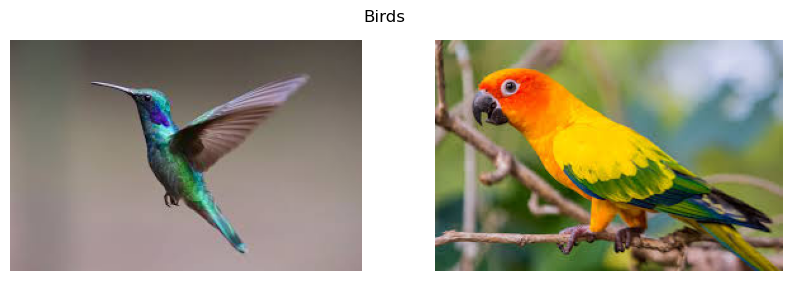

In [154]:
# displaying birds
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
fig.suptitle('Birds')
for i, (image, label) in enumerate(birds_testset):
        axs[i].imshow(image)
        axs[i].axis('off')

plt.show()

In [104]:
# 3. preprocessing birds 
resize = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

birds_testset.set_transform([resize, normalize])

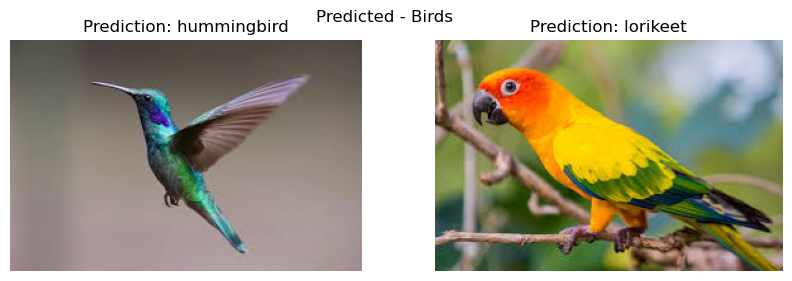

In [153]:
# 4. evaluation
model.eval()
birds_testset.set_transform([resize, normalize])
birds_loader = DataLoader(birds_testset, batch_size=2, shuffle=False)
with torch.no_grad():
    for images, labels in birds_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 3))
    fig.suptitle('Predicted - Birds')
    birds_testset.set_transform(None)
    for i, (image, label) in enumerate(birds_testset):
            axs[i].imshow(image)
            axs[i].axis('off')
            axs[i].set_title(f'Prediction: {weights.meta["categories"][predicted[i]]}')
    
    plt.show()

The predicted classes are correct (googled for the hummingbird and lorikeet to see :))

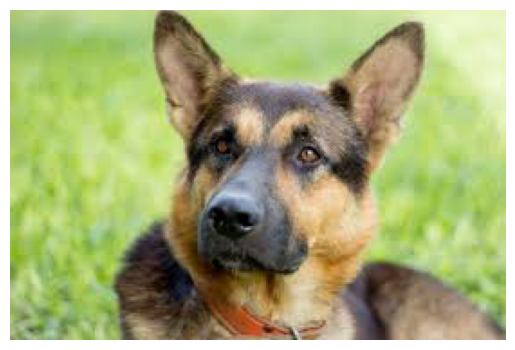

Prediction: German shepherd (235)


In [290]:
# 5. choosing a dog image and feeding it to a model
base_dir = os.path.join('HW1_data_updated', 'dogs')
dogs_testset = CustomDataset(txt_path="dogs.txt", base_dir=base_dir, img_dir='dogs', splitter=',')

dog_idx = 7

image, label = dogs_testset[dog_idx]

plt.imshow(image)
plt.axis('off')
plt.show()

dogs_testset.set_transform([resize, normalize])
dogs_loader = DataLoader(dogs_testset[dog_idx], batch_size=1, shuffle=False)

model.eval()
with torch.no_grad():
    image = next(iter(dogs_loader))
    output = model(image)
    _, predicted = torch.max(output.data, 1)
    print(f'Prediction: {weights.meta["categories"][predicted[0]]} ({predicted[0]})')

As we can see, predicted class of the above dog is correct.

In [247]:
# checking what is the first layer to apply the filters on image
print(list(model.children())[0][0])

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


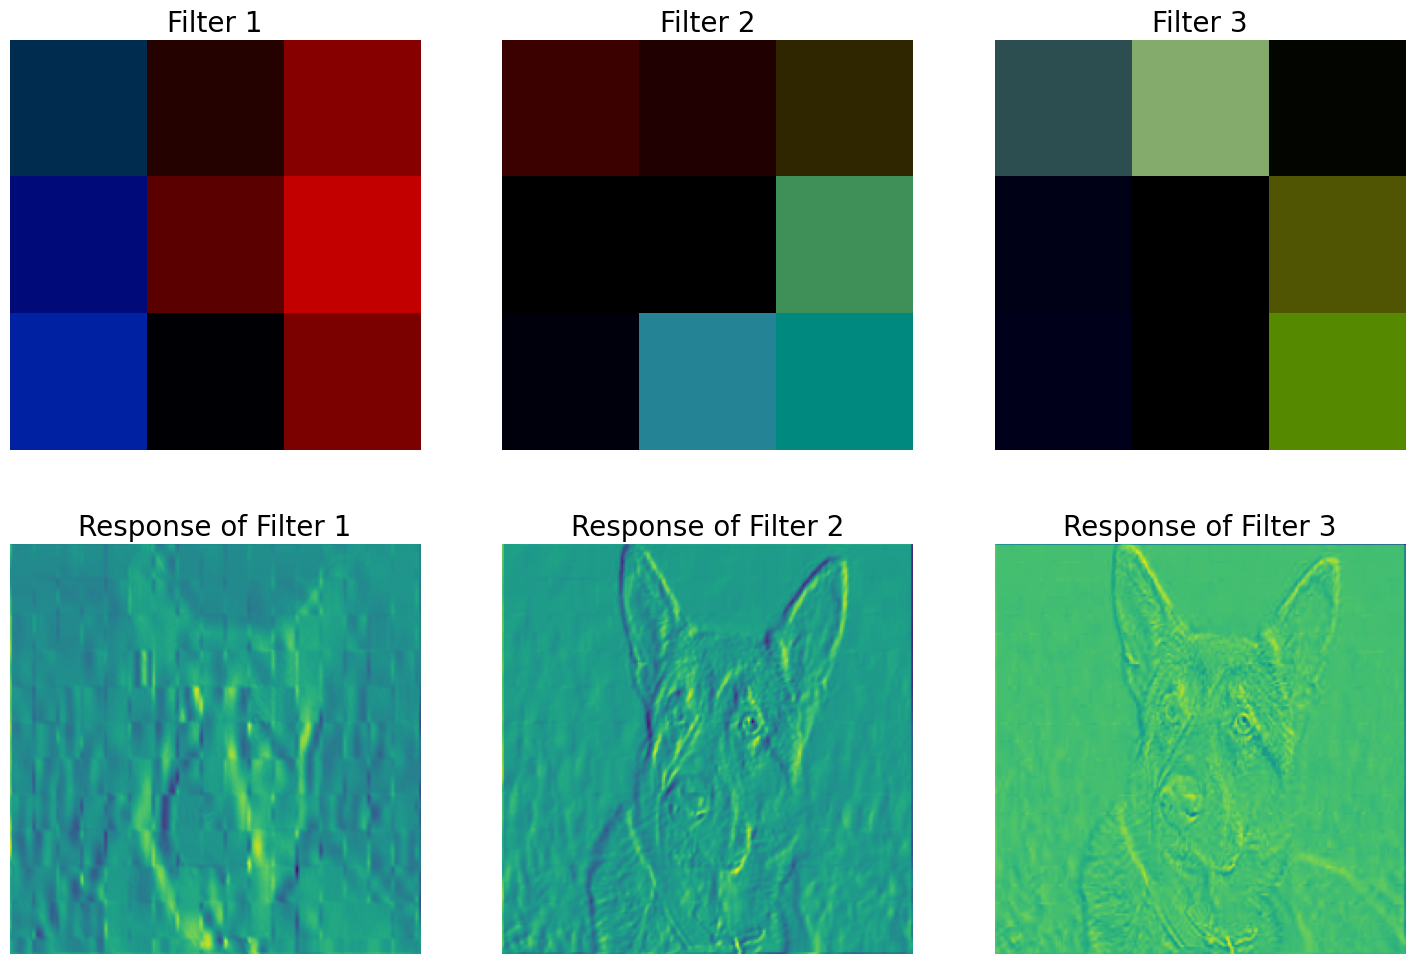

In [295]:
# 6. observing the filters

k = 3
start = 0
# first 3 filters of the first layer
filters = model.features[0].weight.data[start:start + k].clone()
image = next(iter(dogs_loader))

fig, axes = plt.subplots(2, k, figsize=(18, 12))

for i in range(k):
    filter_i = filters[i].numpy()
    
    # Plot filter i (need to transpose to ajust the correct image for matplotlib)
    axes[0, i].imshow(filter_i.transpose((1, 2, 0)))
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Filter {i+1}', fontsize=20)

    # Plot response of filter on bottom, using conv2d with the same parameters as in the first layer of the model
    filter_i = filter_i.reshape(1, 3, 3, 3)
    response_i = torch.conv2d(image, torch.tensor(filter_i), padding=1, stride=1)
    response_i = response_i.squeeze(0).permute(1, 2, 0).detach().numpy()
    axes[1, i].imshow(response_i)
    axes[1, i].axis('off')
    axes[1, i].set_title(f'Response of Filter {i+1}', fontsize=20)

plt.show()

<ul style="font-size: 17px">The filters are 3X3 squares. We can see that each filter emphasise different image aspects, though it's pretty hard to understand, what role those aspects exactly play.